# Carlos Cantu 
# Market Pipe Funnel 
# DSC 540

# Web Scrape

The primary objective of this web scraping initiative is to retrieve a dataset comprising 1000 rows of stock tickers for the most significant stock gainers. Specifically, we are interested in stocks with prices ranging from $1 to $60 at the current moment. This data will be extracted from a total of 40 web pages, each displaying 25 different companies. To identify the most promising candidates among these companies, a two-tier sorting process will be employed. First, the companies will be sorted based on their trading volume, and then, within each volume category, they will be further sorted by the net percentage change in stock price. Ultimately, the top 25 companies that meet these criteria will be selected for further analysis.

To ensure that the data is in the most usable and relevant format, a series of data transformations will be applied. These transformations are categorized and labeled as transformation (1-6). While it's important to note that additional transformation steps do exist, our current focus is on these initial six stages.

The initial transformation steps will involve extracting and processing data from the web pages. This may include stripping away unnecessary text, formatting values, and structuring the data to make it amenable to analysis. These actions are essential for ensuring the integrity and usability of the dataset.

Once the data has been appropriately processed through these initial transformations, it will be ready for sorting and analysis. The sorting process will be instrumental in identifying the top-performing stocks based on trading volume and net percentage change in price. This approach allows us to pinpoint the most promising investment opportunities among the candidates.

In conclusion, the web scraping effort aims to compile a dataset of 1000 rows containing stock tickers of significant stock gainers within a price range of $1 to $60, extracted from 40 pages, each displaying 25 companies. These companies will be meticulously sorted by volume and net percentage change, ultimately selecting the top 25. 

#### **Note takes a good 3 min to run**  

In [1]:
import requests # for my scrape 
from bs4 import BeautifulSoup # for my  scrape
import pandas as pd
import os
import glob
import sqlite3

In [2]:
# web scrape 
# Base URL for Marketwatch 
url = "https://www.marketwatch.com/tools/screener/stock"

# list to store scraped data 
data_list = []

# number of pages to scrape 
pages_to_scrape = 40 # pages give 25 results each 40*25= 1000 per project requirement  

# loop through pages 
for page_number in range(1, pages_to_scrape + 1): # Adding +1 ensures that the loop will include the last page 
    # define parameters for the pages
    params = {
        "exchange": "all",
        "skip": (page_number - 1) * 25,
        "orderbyfield": "Volume", 
        "direction": "desc",
        "visiblecolumns": "Symbol,CompanyName,Price,NetChange,ChangePercent,Volume",
        "pricemin": 1,
        "pricemax": 60,
    }

    # GET request for the current page 
    response = requests.get(url, params=params)

    # check if request works
    if response.status_code == 200:
        # parse page HTML content
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the data 
        stock_table = soup.find("table", {"class": "table"})
        rows = stock_table.find_all("tr") # "tr" tag represents table rows in HTML
        # transformations 1-6 below
        for row in rows[1:]: # skip header row
            columns = row.find_all("td") #  "td" tag represents table data cells in HTML tables
            symbol = columns[0].text.strip() # extracted text to remove any leading or trailing whitespace characters Tranformations 1-6
            company_name = columns[1].text.strip()
            price = columns[2].text.strip()
            net_change = columns[3].text.strip()
            change_percent = columns[4].text.strip()
            volume = columns[5].text.strip()


            # store data in a dictionary 
            stock_data = {
                "Symbol": symbol,
                "Company Name": company_name,
                "Price": price,
                "Net Change": net_change,
                "Change Percent": change_percent,
                "Volume": volume,
            }
            data_list.append(stock_data) # add to my list 
    else:
        print("Failed to retrieve the webpage for page", page_number) # in case something goes wrong 
df = pd.DataFrame(data_list) # scraped data in a Pandas DataFrame 

                


In [3]:
# Calculate the length (number of results) in data_list
results_length = len(data_list)

# Print the results length
print("Number of results:", results_length)
print(df.head(20))

Number of results: 1000
   Symbol                          Company Name   Price Net Change  \
0    PLTR            Palantir Technologies Inc.  $17.91       0.30   
1     SMX            SMX (Security Matters) PLC   $2.58       0.89   
2    RIVN           Rivian Automotive Inc. Cl A  $19.89       1.11   
3     NIO                          NIO Inc. ADR   $8.84       0.50   
4     BAC                 Bank of America Corp.  $27.17       0.86   
5    NKLA                          Nikola Corp.   $1.43       0.05   
6    LCID                      Lucid Group Inc.   $5.39       0.36   
7    AKRO               Akero Therapeutics Inc.  $18.47     -30.07   
8     AAL          American Airlines Group Inc.  $12.36       0.12   
9     AMC  AMC Entertainment Holdings Inc. Cl A  $10.04       0.22   
10      F                        Ford Motor Co.  $12.21       0.14   
11   MARA        Marathon Digital Holdings Inc.   $8.52       0.16   
12    CCL                        Carnival Corp.  $13.00       0.31

In [4]:
# test for my eyeballs 
#csv_file_name = "marketwatch_data.csv"

# Save the DataFrame to a CSV file
#df.to_csv(csv_file_name, index=False)  # Set index=False to exclude the index column

## Critera Decisions 

In [5]:
# fix volume column function
def convert_volume(volume_str): 
    if 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1000000  # converts string to numbers millions 
    elif 'K' in volume_str:
        return float(volume_str.replace('K', '')) * 1000 # just in case for thousands  may be unlikely
    else:
        return float(volume_str.replace(',', '')) # for under millions

# sorting prep
df['Volume'] = df['Volume'].apply(convert_volume) # apply & call the function 
df['Change Percent'] = df['Change Percent'].str.rstrip('%').astype(float) # remove percent symbol 

# sort by volume
df.sort_values(by=['Volume'], ascending=False, inplace=True) # this is a double check webscraper should already be sorted by volume 

# select the top 25
top_25_volume = df.head(25) # pull the top 25 higest 

# sort by change percent
top_25_volume.sort_values(by=['Change Percent'], ascending=False, inplace=True) # sorts my top 25 by highest change in percent "if i want to trade short reverse" 

# Print the resulting DataFrame
print(top_25_volume)



   Symbol                          Company Name   Price Net Change  \
1     SMX            SMX (Security Matters) PLC   $2.58       0.89   
14    MOB                    Mobilicom Ltd. ADR   $1.76       0.31   
20    RUN                           SunRun Inc.  $11.74       1.24   
16   PLUG                       Plug Power Inc.   $7.09       0.68   
6    LCID                      Lucid Group Inc.   $5.39       0.36   
3     NIO                          NIO Inc. ADR   $8.84       0.50   
2    RIVN           Rivian Automotive Inc. Cl A  $19.89       1.11   
22   SNAP                             Snap Inc.   $8.95       0.34   
5    NKLA                          Nikola Corp.   $1.43       0.05   
4     BAC                 Bank of America Corp.  $27.17       0.86   
19     NU                 Nu Holdings Ltd. Cl A   $7.55       0.24   
12    CCL                        Carnival Corp.  $13.00       0.31   
9     AMC  AMC Entertainment Holdings Inc. Cl A  $10.04       0.22   
13    WBD  Warner Br

/var/folders/90/68qhzxsx2zs8j6gfxb__pwwr0000gn/T/ipykernel_49456/1825347832.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_volume.sort_values(by=['Change Percent'], ascending=False, inplace=True) # sorts my top 25 by highest change in percent "if i want to trade short reverse"


### Into SQL

In [18]:
# # into sql light 
# # create connection to sqlight
# conn = sqlite3.connect('finalproject.db')
# # convert to sql table
# top_25_volume.to_sql('top_25_volume', conn, if_exists='replace', index=False)
# # commit changes 
# conn.commit()
# conn.close()

# Flat File 

The primary objective behind the utilization of this flat file is to conduct a targeted search within the file folder for specific Tickers that have been previously identified through a web scraping process. Once these relevant CSV files have been located, they are subsequently amalgamated or concatenated together. This amalgamation allows for the examination of the "OperatingIncomeLoss" column on a year-over-year basis for each ticker. This analysis serves as a preliminary assessment to gauge the overall improvement in the health and performance of the businesses represented by these Tickers.

The overarching goal here is to identify and highlight companies that exhibit positive trends in their operating income or financial health over time. This process involves a series of data transformations, which are categorized and labeled as transformation (1-5). While it's worth noting that there may be additional transformation steps beyond the initial five, our current focus centers on these initial stages.

These transformations play a pivotal role in preparing the data for meaningful analysis. They encompass various operations such as data cleansing, normalization, aggregation, and calculation of relevant metrics. Through these transformations, the data becomes more structured and conducive to extracting valuable insights.

Once these transformations are applied, the data can be leveraged to determine the extent to which a company's financial health is improving year after year. This assessment can provide valuable insights into the stability and growth potential of these businesses. Ultimately, after conducting this analysis, the top two performing companies can be identified and further evaluated for potential investment or strategic opportunities.

In summary, the process involves locating, consolidating, and transforming data from CSV files, with a focus on assessing the year-over-year improvement in operating income for selected Tickers. The labeled transformations (1-5) represent the initial steps in preparing and analyzing the data, with the ultimate aim of identifying and selecting the top-performing companies.

The column length of each transformation of the concataned file will vary (will always meet requirement) 
the row length of the concatanated fill will vary on Ticker and avalable information of the file.   

## Preliminaries

In [7]:
# folder path to search 
folder_path = '/Users/cantu/Documents/Data Science Masters/Data Prep DSC 540/Data for course/SEC_10Karchive/sec_data_made_useable/sec_data_made_useable'

# Initialize an empty DataFrame to store the combined data from matching CSV files
combined_data = pd.DataFrame()

# Define the keywords as the top 4 symbols from the 'top_25_volume' DataFrame
top_symbols = top_25_volume['Symbol'].head(4).tolist()  # Extract top 3 symbols as keywords

# Initialize a list to store the matching CSV file paths
matching_csv_files = []

# Initialize a list to store symbols not found
symbols_not_found = top_symbols.copy()

print(top_symbols)

['SMX', 'MOB', 'RUN', 'PLUG']


## Find CSV 


In [8]:
# data set source = https://www.kaggle.com/datasets/chad116/sec-company-facts-all-10q-10k-financial-data?resource=download
# note data set may not contain all tickers but that is ok 

# Error function for reading CSV files
def read_csv_file(csv_file):
    try:
        data = pd.read_csv(csv_file)
        return data
    except Exception as e:
        print(f"Error reading {csv_file}: {str(e)}")
        return None

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Check if any of the top 3 symbols are in the filename
        
        found_symbols = [symbol for symbol in top_symbols if symbol in filename]  #old code
        if found_symbols:
            matching_csv_files.append(os.path.join(folder_path, filename))
            # Remove found symbols from the list of symbols not found
            symbols_not_found = [symbol for symbol in symbols_not_found if symbol not in found_symbols]

# Print symbols not found in CSV filenames # tranformation 1
if symbols_not_found:
    print("Symbols not found in CSV filenames:\n", symbols_not_found)

# reading and concatenating the data from matching CSV files transformation 2
for csv_file in matching_csv_files:
    data = read_csv_file(csv_file)
    if data is not None:
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# combined_data contains the concatenated data from all matching CSV files
rows = combined_data.shape[0]  # for finding the length rows
cols = combined_data.shape[1]  # for finding the length columns 
print('\n The combined_data row length is ', rows)
print('\n The combined_data column length is', cols)
print('\n', combined_data.head())  



Symbols not found in CSV filenames:
 ['SMX', 'MOB']

 The combined_data row length is  76

 The combined_data column length is 766

           end       filed  form         Name Ticker            CIK Currency  \
0  2015-06-30  2015-09-15  10-Q  Sunrun Inc.    RUN  CIK0001469367      USD   
1  2015-09-30  2015-11-13  10-Q  Sunrun Inc.    RUN  CIK0001469367      USD   
2  2015-12-31  2016-03-11  10-K  Sunrun Inc.    RUN  CIK0001469367      USD   
3  2016-03-31  2016-05-13  10-Q  Sunrun Inc.    RUN  CIK0001469367      USD   
4  2016-06-30  2016-08-11  10-Q  Sunrun Inc.    RUN  CIK0001469367      USD   

   AccountsPayableCurrent  AccountsReceivableNetCurrent  \
0              69566000.0                    49619000.0   
1              97908000.0                    53717000.0   
2             104133000.0                    60275000.0   
3              93701000.0                    56774000.0   
4              93681000.0                    56572000.0   

   AccruedEmployeeBenefitsCurrent  ..

In [9]:
# test for my eyeballs 
#csv_file_name = "combined10k.csv"

# Save the DataFrame to a CSV file
#combined_data.to_csv(csv_file_name, index=False)  # Set index=False to exclude the index column

### Into SQL

In [19]:
# # into sql light 
# # create connection to sqlight
# conn = sqlite3.connect('finalproject.db')
# # convert to sql table
# combined_data.to_sql('combined_data', conn, if_exists='replace', index=False)
# # commit changes 
# conn.commit()
# conn.close()

## Working with the flat file data 

In [11]:
# filter data to only keep rows with 10-k data 
filtered_data = combined_data[combined_data['form'] == '10-K'] # transformation 3 # mistake made used small k

filtered_data = filtered_data[filtered_data['Ticker'].isin(top_symbols)] # remove any key word matches that do not belong
# convert 'filed' column to datetime format 
filtered_data['filed'] = pd.to_datetime(filtered_data['filed']) # transformation 4
# make sure it is numeric 
filtered_data['OperatingIncomeLoss'] = pd.to_numeric(filtered_data['OperatingIncomeLoss'], errors='coerce') # Transformation 5 requirements satisfied

In [12]:
# test for my eyeballs 
#csv_file_name = "filtered10k.csv"

# Save the DataFrame to a CSV file
#filtered_data.to_csv(csv_file_name, index=False)  # Set index=False to exclude the index column

In [13]:
# sort the data by ticker and filed date
filtered_data.sort_values(by=['Ticker', 'filed']) 

# percentage change in 'OperatingIncomeLoss' within each ticker group
filtered_data['OperatingIncomeLoss_Pct_Change'] = filtered_data.groupby('Ticker')['OperatingIncomeLoss'].pct_change(periods=1, fill_method='pad') * 100

print(filtered_data[['Ticker', 'filed', 'OperatingIncomeLoss', 'OperatingIncomeLoss_Pct_Change']])


   Ticker      filed  OperatingIncomeLoss  OperatingIncomeLoss_Pct_Change
2     RUN 2016-03-11        -2.192000e+08                             NaN
6     RUN 2017-03-08        -1.920760e+08                      -12.374088
10    RUN 2018-03-06        -1.811330e+08                       -5.697224
14    RUN 2019-02-28        -1.218810e+08                      -32.711875
18    RUN 2020-02-27        -2.157400e+08                       77.008722
22    RUN 2021-02-25        -4.651080e+08                      115.587281
26    RUN 2022-02-17        -6.661870e+08                       43.232755
27   PLUG 2009-03-16                  NaN                             NaN
28   PLUG 2010-03-16        -4.127077e+07                             NaN
31   PLUG 2011-03-31        -4.752887e+07                       15.163507
35   PLUG 2012-03-30        -3.112710e+07                      -34.509060
39   PLUG 2013-04-01        -3.667178e+07                       17.813031
43   PLUG 2014-03-31        -2.896500e

/var/folders/90/68qhzxsx2zs8j6gfxb__pwwr0000gn/T/ipykernel_49456/341996614.py:5: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  filtered_data['OperatingIncomeLoss_Pct_Change'] = filtered_data.groupby('Ticker')['OperatingIncomeLoss'].pct_change(periods=1, fill_method='pad') * 100


In [14]:
# test for my eyeballs 
#csv_file_name = "filtered10k.csv"

# Save the DataFrame to a CSV file
#filtered_data.to_csv(csv_file_name, index=False)  # Set index=False to exclude the index column

In [15]:
# Pick the top healthy... ish company 
# Group the data by 'Ticker' and calculate the sum of positive 'OperatingIncomeLoss_Pct_Change' values
positive_pct_change = filtered_data[filtered_data['OperatingIncomeLoss_Pct_Change'] > 0]
top_tick  =  positive_pct_change.groupby('Ticker')['OperatingIncomeLoss_Pct_Change'].sum().reset_index()

#Sort the tickers based on the sum of positive values in descending order
top_tick = top_tick.sort_values(by='OperatingIncomeLoss_Pct_Change', ascending=False)

# select the top healthy... ish company
healthy_choice = top_tick.head(2) # depending on available data results will vary
print(healthy_choice)

  Ticker  OperatingIncomeLoss_Pct_Change
0   PLUG                     2101.083111
1    RUN                      235.828757


# API

The purpose of using the MarketStack API is to obtain intraday data for specific qualifying stock tickers. The program is designed to select the top two companies from the 'healthy_choice' dataset in the flat file section above. However, it's important to note that even though two tickers are allowed, only one is expected to pass through the API request. This is because the criteria for passing to the API request is based on having a positive 'OperatingIncomeLoss' value. Due to this criteria, it is possible that no companies may qualify to pass through the API request. This design aligns with the program's intention to be run daily, seeking only qualifying stocks.

The transformations involved in this process include converting data from JSON format to a pandas DataFrame, performing time conversions, and finally appending the resulting DataFrames to a list. These transformations are labeled as transformations 1-5.

Please note that the program is designed for daily use to identify and retrieve intraday data for qualifying stocks, and it is flexible to accommodate different sets of qualifying stocks based on the provided criteria.

In [16]:
# marketstack API

import pytz


marketstack_api_key = 'e1f891acfa827' # Altered for display go to account to retrieve 

# Extract the top 2 tickers or one ticker from healthy_choice 
healthy_choice_tickers = healthy_choice['Ticker'].head(2).tolist()

#  list to store Data for each ticker
intraday_data_list = []

#  API request URL for Marketstack with the correct API key, interval, and limit
for ticker in healthy_choice_tickers:
    marketstack_url = f'http://api.marketstack.com/v1/tickers/{ticker}/intraday'
    marketstack_params = {
        'access_key': marketstack_api_key,
        'interval': '30min',  # Set the interval to 30 minutes
        'limit': 100  # Limit the results to 100
    }

    # Make the API request for Marketstack 
    marketstack_response = requests.get(marketstack_url, params=marketstack_params)

    # Check if  request was successful
    if marketstack_response.status_code == 200:
        # Parse the JSON response 
        marketstack_data = marketstack_response.json().get("data", {}).get("intraday", []) # Transformation 1

        # Convert  data to a DataFrame
        marketstack_df = pd.DataFrame(marketstack_data) # transformation 2

        # Convert the date column to a datetime object 
        marketstack_df['date'] = pd.to_datetime(marketstack_df['date']) # transformation 3

        # Convert the times to east time zone and format them "east time zone is market time"
        local_timezone = pytz.timezone('US/Eastern')
        marketstack_df['date'] = marketstack_df['date'].dt.tz_convert(local_timezone).dt.strftime('%Y-%m-%d %I:%M:%S %p') # transformation 4 

        # Append the Data to the list
        intraday_data_list.append(marketstack_df) # transformation 5
    else:
        print(f"Marketstack API request failed for ticker {ticker} with status code {marketstack_response.status_code}")

# Concatthe Data for each ticker into a single DataFrame
combined_intraday_data = pd.concat(intraday_data_list)

# Print 
print("Intraday Data:")
print(combined_intraday_data)

# Export to a CSV file
#combined_intraday_data.to_csv('combined_intraday_data.csv', index=False)


Intraday Data:
      open    high     low    last  close    volume                    date  \
0    6.430   7.105   6.405   7.060   6.41  381959.0  2023-10-10 01:30:00 PM   
1    6.430   7.105   6.405   7.080   6.41  357693.0  2023-10-10 01:00:00 PM   
2    6.430   7.065   6.405   7.060   6.41  333034.0  2023-10-10 12:30:00 PM   
3    6.430   7.035   6.405   7.000   6.41  300858.0  2023-10-10 12:00:00 PM   
4    6.430   7.035   6.405   6.910   6.41  249709.0  2023-10-10 11:30:00 AM   
..     ...     ...     ...     ...    ...       ...                     ...   
95  12.295  12.300  12.295     NaN    NaN       NaN  2023-09-29 02:00:00 PM   
96  12.405  12.410  12.405     NaN    NaN       NaN  2023-09-29 01:30:00 PM   
97  12.580  13.095  12.385  12.385  12.30  177494.0  2023-09-29 01:00:00 PM   
98  12.580  13.095  12.390  12.550  12.30  165091.0  2023-09-29 12:30:00 PM   
99  12.580  13.095  12.390  12.500  12.30  142796.0  2023-09-29 12:00:00 PM   

   symbol exchange  
0    PLUG     I

### Into SQL

In [20]:
# # into sql light 
# # create connection to sqlight
# conn = sqlite3.connect('finalproject.db')
# # convert to sql table
# combined_intraday_data.to_sql('combined_intraday_data', conn, if_exists='replace', index=False)
# # commit changes 
# conn.commit()
# conn.close()

# SQLite and Visualizations 

In [24]:
# Connect to the SQLite database
conn = sqlite3.connect('finalproject.db')

# SQL query to join tables
query = """
SELECT 
    top_25_volume.*, 
    combined_data.*, 
    combined_intraday_data.*
FROM 
    top_25_volume
LEFT JOIN 
    combined_data 
ON 
    top_25_volume.Symbol = combined_data.Ticker
LEFT JOIN 
    combined_intraday_data 
ON 
    top_25_volume.Symbol = combined_intraday_data.symbol
"""

# Execute the query and fetch the data into a DataFrame
result = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Print the first few rows of the result
print(result.head())

  Symbol                Company Name   Price Net Change  Change Percent  \
0    SMX  SMX (Security Matters) PLC   $2.58       0.89           52.73   
1    MOB          Mobilicom Ltd. ADR   $1.76       0.31           21.39   
2    RUN                 SunRun Inc.  $11.74       1.24           11.76   
3    RUN                 SunRun Inc.  $11.74       1.24           11.76   
4    RUN                 SunRun Inc.  $11.74       1.24           11.76   

       Volume         end       filed  form         Name  ... StockIssued1  \
0  55870000.0        None        None  None         None  ...          NaN   
1  17730000.0        None        None  None         None  ...          NaN   
2  14360000.0  2015-06-30  2015-09-15  10-Q  Sunrun Inc.  ...          NaN   
3  14360000.0  2015-06-30  2015-09-15  10-Q  Sunrun Inc.  ...          NaN   
4  14360000.0  2015-06-30  2015-09-15  10-Q  Sunrun Inc.  ...          NaN   

     open   high    low   last  close      volume                    date  \
0  

In [25]:
# check for my eyeballs 
#result.to_csv('combined_data_check.csv', index=False)

#### Visualization 1: Last Values for Ticker RUN  on  2023-10-10 

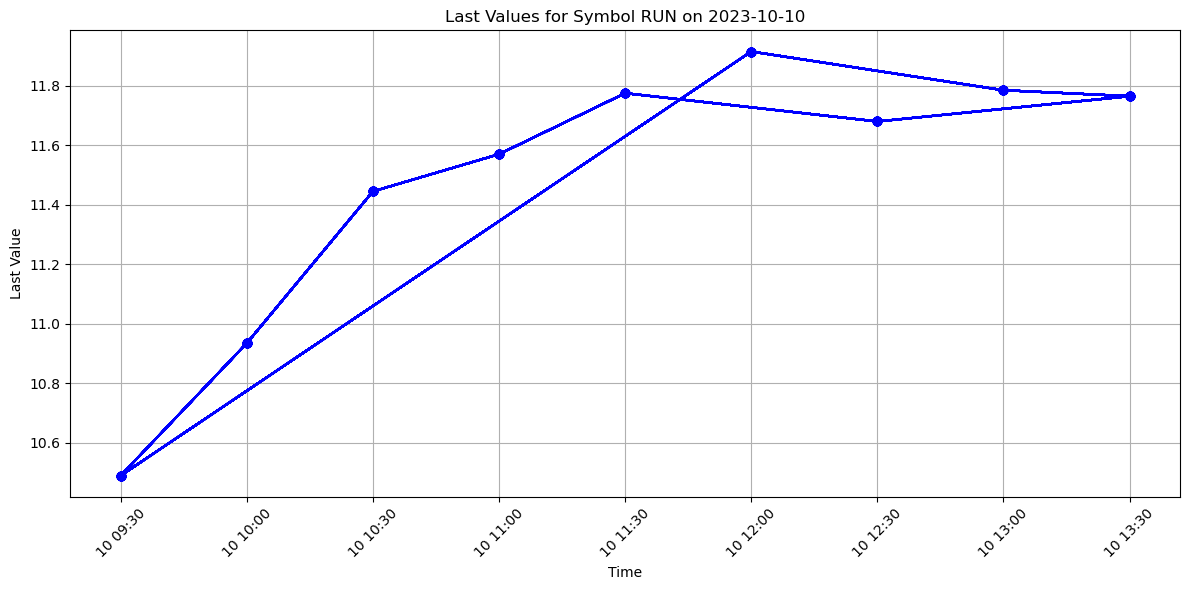

In [27]:
import matplotlib.pyplot as plt
# filter for specific data 
symbol = 'RUN'
date = '2023-10-10'
filtered_data1 = result[(result['symbol'] == symbol) & (result['date'].str.startswith(date))]

# columns for ploting 
last_values = filtered_data1['last']
dates = pd.to_datetime(filtered_data1['date'])

# line plot
plt.figure(figsize=(12, 6))
plt.plot(dates, last_values, marker='o', linestyle='-', color='b')
plt.title(f'Last Values for Symbol {symbol} on {date}')
plt.xlabel('Time')
plt.ylabel('Last Value')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Visualization 2: Last Values for Ticker RUN  on  2023-10-10 

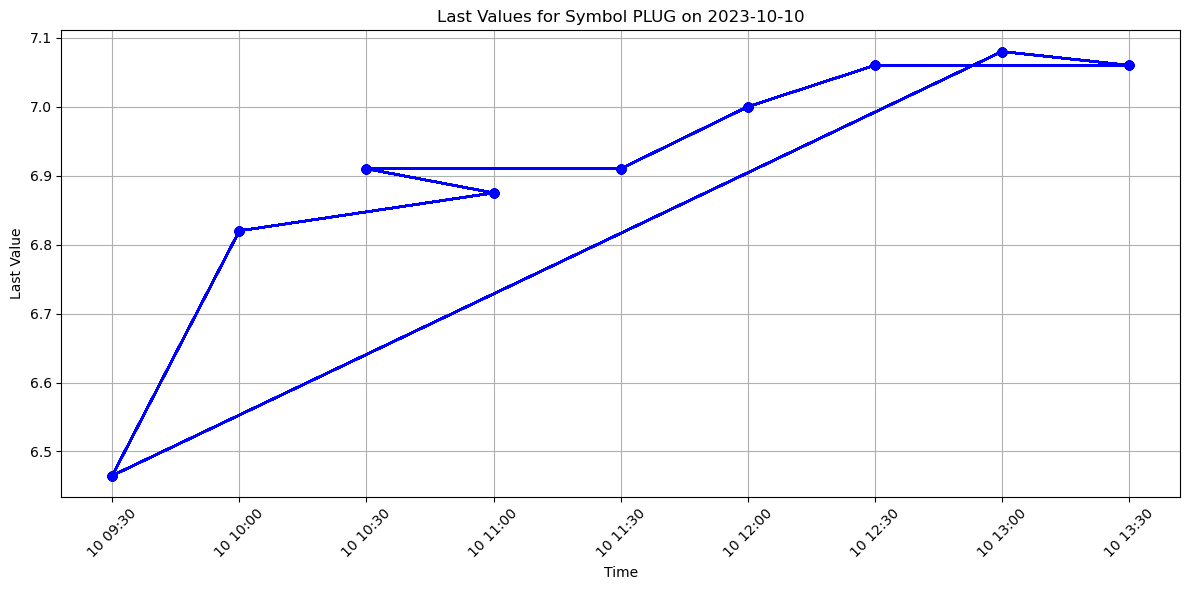

In [29]:
# filter for specific data 
symbol = 'PLUG'
date = '2023-10-10'
filtered_data2 = result[(result['symbol'] == symbol) & (result['date'].str.startswith(date))]

# columns for ploting 
last_values = filtered_data2['last']
dates = pd.to_datetime(filtered_data1['date'])

# line plot
plt.figure(figsize=(12, 6))
plt.plot(dates, last_values, marker='o', linestyle='-', color='b')
plt.title(f'Last Values for Symbol {symbol} on {date}')
plt.xlabel('Time')
plt.ylabel('Last Value')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Visualization 3: change in percent price from previous close to market open 

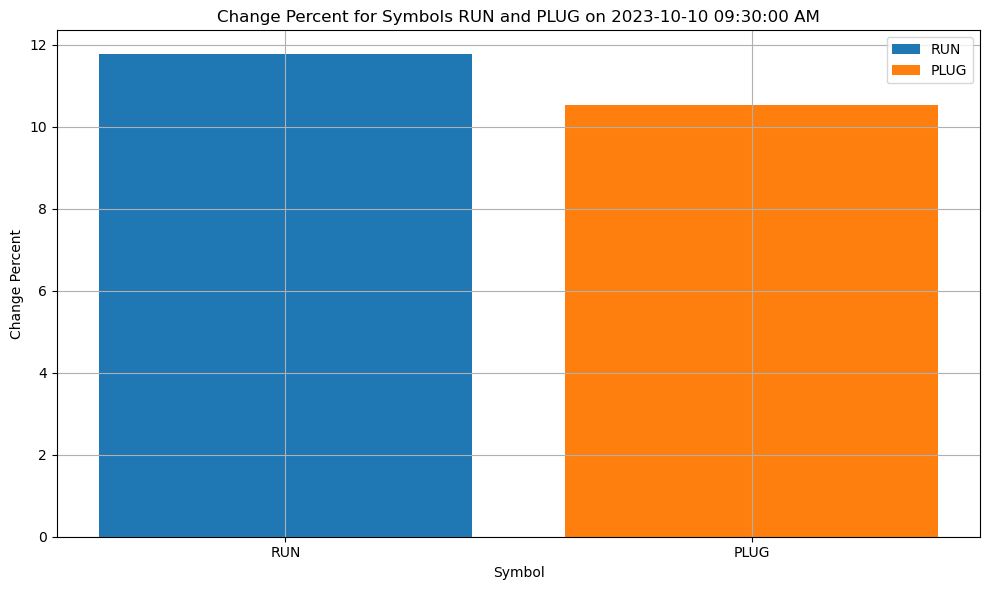

In [42]:


# Filter  Data for symbols RUN and PLUG and date 2023-10-10 
filtered_data3 = result[(result['symbol'].isin(['RUN', 'PLUG'])) & (result['date'] == '2023-10-10 09:30:00 AM')]

#  bar plot for the change percent column
plt.figure(figsize=(10, 6))
for symbol in ['RUN', 'PLUG']:
    symbol_data = filtered_data3[filtered_data3['symbol'] == symbol]
    plt.bar(symbol_data['symbol'], symbol_data['Change Percent'], label=symbol)

plt.title('Change Percent for Symbols RUN and PLUG on 2023-10-10 09:30:00 AM')
plt.xlabel('Symbol')
plt.ylabel('Change Percent')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#### Visualization 4: Volume for tickers on 2023-10-10

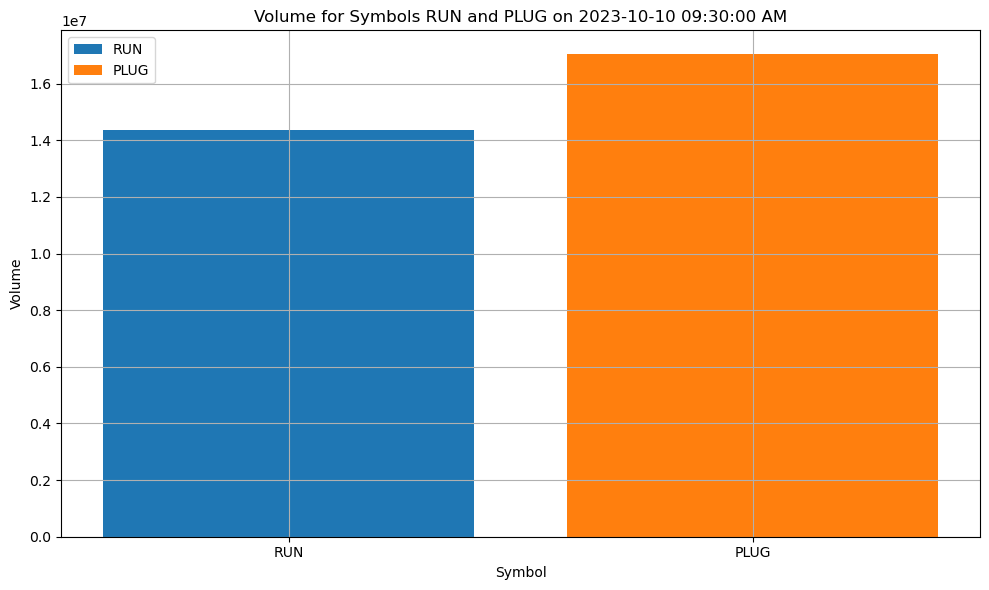

In [43]:
# Filter  Data for symbols RUN and PLUG and date 2023-10-10 
filtered_data4 = result[(result['symbol'].isin(['RUN', 'PLUG'])) & (result['date'] == '2023-10-10 09:30:00 AM')]

#  bar plot for the Volume column
plt.figure(figsize=(10, 6))
for symbol in ['RUN', 'PLUG']:
    symbol_data = filtered_data4[filtered_data4['symbol'] == symbol]
    plt.bar(symbol_data['symbol'], symbol_data['Volume'], label=symbol)

plt.title('Volume for Symbols RUN and PLUG on 2023-10-10 09:30:00 AM')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Visualization 5: Total Operating Income/Loss for Tickers 

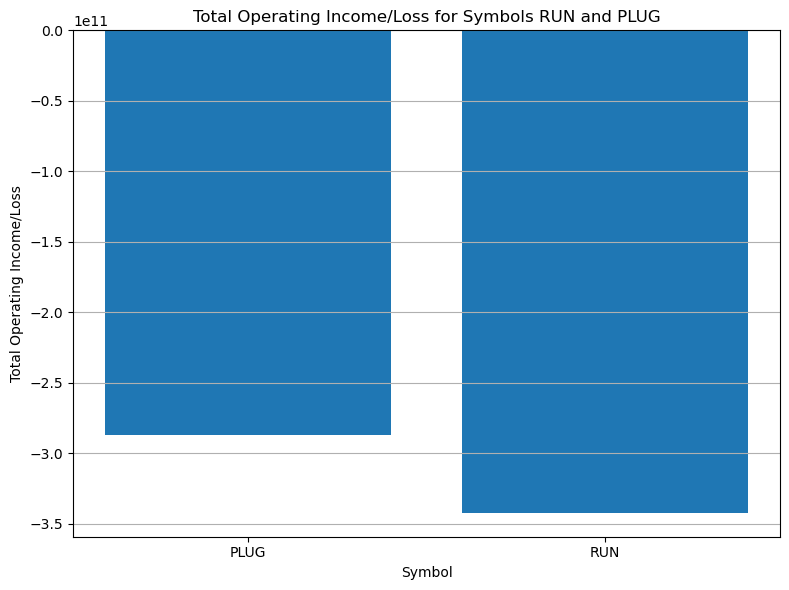

In [45]:
# Filter the Data for symbols 
filtered_data5 = result[(result['symbol'].isin(['RUN', 'PLUG']))]

# Group the data by symbol 
grouped_data = filtered_data5.groupby('symbol')['OperatingIncomeLoss'].sum().reset_index() # calculate the sum

#  bar plot for the summed operatingincomeloss column
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['symbol'], grouped_data['OperatingIncomeLoss'])

plt.title('Total Operating Income/Loss for Symbols RUN and PLUG')
plt.xlabel('Symbol')
plt.ylabel('Total Operating Income/Loss')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Summary

Project Summary: 

Throughout the duration of this project, I have acquired a wealth of techniques and methodologies for data cleaning and preparation. This experience has underscored the paramount importance of data preparation, even for seemingly straightforward tasks. A well-processed dataset is the bedrock of accuracy and is free from troublesome inconsistencies.
Furthermore, this project has vividly illustrated the detrimental effects of utilizing unclean datasets in making critical business decisions. In the realm of high-level business choices, an unprocessed dataset can lead to severe consequences, such as:

1.	Misinformed Decisions: Unclean data can mislead decision-makers, resulting in misguided strategic choices that impact the organization's bottom line.
2.	Inefficient Resource Allocation: Business resources, such as finances and manpower, can be squandered on initiatives driven by data that lacks integrity, potentially leading to suboptimal outcomes.
3.	Reputational Damage: Relying on inaccurate data may erode trust with stakeholders and damage the organization's reputation in the long run.

In tandem with the significance of data cleaning and preparation, the ethical dimension has come into sharp focus. I now recognize and appreciate the substantial responsibility that falls upon those entrusted with the task of data cleaning and preparation, as stakeholders rely on this information for critical decisions. This journey has made me acutely aware of my capacity to influence and manipulate data, emphasizing the utmost importance of maintaining the integrity of data by cleaning and preparing it meticulously while preserving its original form.
In summary, this project has not only expanded my technical expertise in data preparation but has also instilled in me a profound understanding of the ethical obligations that come with this role. It is clear that maintaining data accuracy and integrity is a fundamental duty to the organization and its stakeholders.
